<a href="https://colab.research.google.com/github/AnthonyCampos123/PyTorch_Neural_Network_SURP/blob/main/PyTorch_Neural_Network_2_SURP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch: 0 and loss: 1.5045685768127441
Epoch: 10 and loss: 1.3280061483383179
Epoch: 20 and loss: 1.276517629623413
Epoch: 30 and loss: 1.1822969913482666
Epoch: 40 and loss: 1.0443170070648193
Epoch: 50 and loss: 0.9161267876625061
Epoch: 60 and loss: 0.8485655188560486
Epoch: 70 and loss: 0.8209235668182373
Epoch: 80 and loss: 0.8101115226745605
Epoch: 90 and loss: 0.8015316128730774
1.) tensor([-1.7367,  2.7140,  1.0123,  5.6876]) 	 3 	  3
2.) tensor([ 0.7192, -1.7690,  0.3541, -4.2059]) 	 0 	  0
3.) tensor([ 0.9899, -2.6793,  0.7827, -5.8239]) 	 0 	  0
4.) tensor([ 0.4286, -1.2906,  0.4741, -3.0551]) 	 2 	  2
5.) tensor([-0.2657,  0.0539,  0.5589, -0.1744]) 	 3 	  2
6.) tensor([ 0.6292, -2.2776,  1.2150, -4.7451]) 	 2 	  2
7.) tensor([-1.4479,  2.3369,  0.7078,  4.7189]) 	 3 	  3
8.) tensor([-0.7451,  0.3106,  1.4830,  0.8582]) 	 2 	  2
9.) tensor([-1.4121,  1.9248,  1.1484,  4.0849]) 	 3 	  3
10.) tensor([ 0.7144, -2.3033,  1.0225, -4.9026]) 	 2 	  2
11.) tensor([ 0.5359, -1.9578, 

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=4, bias=True)
)

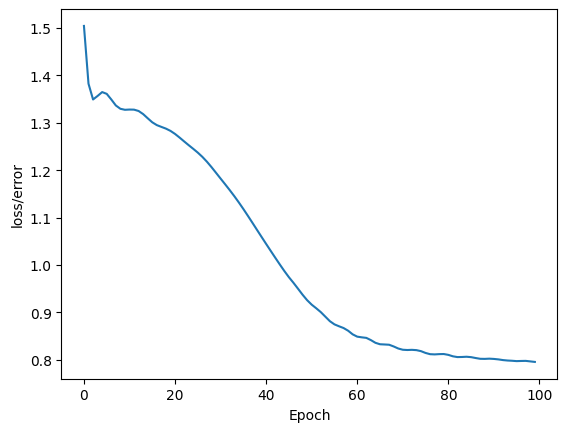

In [18]:
import torch
import torch.nn as nn
# import numpy as np
import torch.nn.functional as F # helps move data forward in the function

# Creating a model class that inherits nn.module
class Model(nn.Module):
  # input layer - 4 features of the diamond ->
  # hidden layer1 (some number of neurons) ->
  # H2 (n) -> output (4 classes of diamond classification)
  def __init__(self, in_features=4, h1=8, h2=9, out_features=4):
    super().__init__() # instantiates nn.Module
    self.fc1 = nn.Linear(in_features, h1) # input -> h1
    self.fc2 = nn.Linear(h1, h2) # h1 -> h2
    self.out = nn.Linear(h2, out_features) # h2 -> output

  def forward(self, x):
    # rectified linear unit
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

# manual seed for randomization
torch.manual_seed(25)

# create an instance of model
model = Model()

# to load in data
import pandas as pd
# to create chart
import matplotlib.pyplot as plt
%matplotlib inline

# for juypter notebook

# loading in data / iris dataset
url = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds_filter.csv'
my_df = pd.read_csv(url)
# dataframe

# last column changed from strings to nums
# 0 = Fair
# 1 = Good
# 2 = Ideal
# 3 = Premium

my_df['cut'] = my_df['cut'].replace('Fair', 0)
my_df['cut'] = my_df['cut'].replace('Good', 1)
my_df['cut'] = my_df['cut'].replace('Ideal', 2)
my_df['cut'] = my_df['cut'].replace('Premium', 3)






# train test split: set X=input, y=output
X = my_df.drop('cut', axis=1) # drop column
y = my_df['cut']

# convert to numpy arrays
X = X.values
y = y.values

# train model
from sklearn.model_selection import train_test_split

# train test split, test size = 20%, train size = 80%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=41)

# Ensure y is of integer type
y = y.astype(int)

# convert X features (numpy arrays) to float tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

# Convert y labels to tensors long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# set the crierion of model to meansure the error (how far predictions
# are from the model)
criterion = nn.CrossEntropyLoss()

#Choose Adam Optimizer, lr = learning rate (if error is not minimized after
# a large number of iterations (epochs), lower learning rate)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# train the model
# epochs (one iteration through all the training data in network)
epochs = 100
losses = []
for i in range(epochs):
  # go forward and get a prediction
  y_pred = model.forward(X_train) # get predicted results

  # measure the loss/error
  loss = criterion(y_pred, y_train) # predicted values vs the y_train


  # keep track of losses, will help determine accuracy
  losses.append(loss.detach().numpy())

  # print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  # back propagation : take error rate of forward propogation and feed it back
  # through the network to tweak weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

plt.plot(range(epochs), losses)
plt.ylabel("loss/error")
plt.xlabel('Epoch')

# evaluate model on test data set (validate model on test set)
with torch.no_grad(): # turn off back propagation, not necessary here
  y_eval = model.forward(X_test) # X_test features from test, y_eval = predictions
  loss = criterion(y_eval, y_test) # find loss/error

# check correct
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
      y_val = model.forward(data)

      if y_test[i] == 0:
        x = 'Fair'
      elif y_test[i] == 1:
        x = 'Good'
      elif y_test[i] == 1:
        x = 'Ideal'
      else:
        x = 'Premium'

      # type of diamond classification the neural network predicts
      print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t  {y_val.argmax().item()}')

      # if test matches prediction
      if y_val.argmax().item() == y_test[i]:
        correct += 1

print(f'Correct: {correct}')

test_classify_diamond_1 = torch.tensor([1.21, 63.6, 58.0, 2.0]). **********

# prediction is the index that is the greatest
# ex. 0 = Fair, 1 = Good, 2 = Ideal, 3 = Premium
with torch.no_grad():
  print(model(test_classify_diamond_1))


test_classify_diamond_2 = torch.tensor([1.0, 60.1, 61.0, 2.0])

with torch.no_grad():
  print(model(test_classify_diamond_2))

# save neural network model
torch.save(model.state_dict(), 'neural_network_2.pt') # save weights and biases for the model

# load the model
new_model = Model()
new_model.load_state_dict(torch.load('neural_network_2.pt'))

# ensure model is loaded correctly
new_model.eval()




















